In [1]:
import keras
import h5py
import cv2
import numpy as np
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img
from keras import backend as K
from tqdm import tqdm
from keras_tqdm import TQDMNotebookCallback
from tqdm import tqdm_notebook
import os

IMG_SIZE = 256
BATCH_SIZE = 64
NB_EPOCHS = 10

MODEL_NAME = 'xrayNet-keras-v2.1' #gve the model a name


D:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def arr_to_bw(arr):
    nu = []
    for im in arr:
        nu.append(cv2.resize(cv2.cvtColor(im, cv2.COLOR_RGB2GRAY),(IMG_SIZE,IMG_SIZE)))
    return np.array(nu).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [3]:
from keras import callbacks

reduce_learning = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    epsilon=0.0001,
    cooldown=2,
    min_lr=0)

eary_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=7,
    verbose=1,
    mode='auto')

callbacks = [TQDMNotebookCallback()] #,eary_stopping, reduce_learning]

In [4]:
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=(IMG_SIZE,IMG_SIZE,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

In [7]:
os.chdir('C:/Science_Research/')

X_train = arr_to_bw(np.load(f'image_batches/X_train_{0}.npy'))
Y_train = np.load(f'image_batches/Y_train_{0}.npy').reshape(-1,1)

history = model.fit(
        X_train,
        Y_train,
        batch_size=16,
        epochs=10,
        validation_split=0.1,
        verbose = 2,
        callbacks=callbacks
        )

Train on 9000 samples, validate on 1000 samples


Epoch 1/10
 - 139s - loss: 0.7014 - acc: 0.5984 - val_loss: 0.6369 - val_acc: 0.6680


Epoch 2/10
 - 138s - loss: 0.6784 - acc: 0.6102 - val_loss: 0.6973 - val_acc: 0.5350


Epoch 3/10
 - 138s - loss: 0.6533 - acc: 0.6336 - val_loss: 0.6491 - val_acc: 0.6440


Epoch 4/10
 - 138s - loss: 0.6238 - acc: 0.6601 - val_loss: 0.6747 - val_acc: 0.5650


Epoch 5/10
 - 138s - loss: 0.6001 - acc: 0.6831 - val_loss: 0.6754 - val_acc: 0.6150


Epoch 6/10
 - 138s - loss: 0.5646 - acc: 0.7100 - val_loss: 0.6495 - val_acc: 0.6430


Epoch 7/10
 - 138s - loss: 0.5137 - acc: 0.7472 - val_loss: 0.7016 - val_acc: 0.6210


Epoch 8/10
 - 138s - loss: 0.4659 - acc: 0.7838 - val_loss: 0.6624 - val_acc: 0.6350


Epoch 9/10
 - 138s - loss: 0.4107 - acc: 0.8196 - val_loss: 0.7001 - val_acc: 0.6510


Epoch 10/10
 - 139s - loss: 0.3619 - acc: 0.8560 - val_loss: 0.7354 - val_acc: 0.6060



In [19]:
os.chdir('C:/Science_Research/')
histories = []
for bat in tqdm_notebook(range(10)):
    print(f"---------STARTING BATCH #{bat+1}/{NB_EPOCHS}------")
    X_train = arr_to_bw(np.load(f'image_batches/X_train_{bat}.npy'))
    Y_train = np.load(f'image_batches/Y_train_{bat}.npy').reshape(-1,1)
    
    
    print("data loaded.\nStarting Training...")
    history = model.fit(
        X_train,
        Y_train,
        batch_size=32,
        epochs=10,
        validation_split=0.1,
        verbose = 2,
        callbacks=callbacks
        )
    histories.append(history)

---------STARTING BATCH #1/10------
data loaded.
Starting Training...
Train on 9000 samples, validate on 1000 samples


Epoch 1/2
 - 132s - loss: 0.6669 - acc: 0.6214 - val_loss: 0.6407 - val_acc: 0.6560


Epoch 2/2
 - 132s - loss: 0.6445 - acc: 0.6394 - val_loss: 0.6382 - val_acc: 0.6580
---------STARTING BATCH #2/10------
data loaded.
Starting Training...
Train on 9000 samples, validate on 1000 samples


Epoch 1/2
 - 130s - loss: 0.6605 - acc: 0.6262 - val_loss: 0.6585 - val_acc: 0.6220


Epoch 2/2
 - 130s - loss: 0.6384 - acc: 0.6410 - val_loss: 0.6422 - val_acc: 0.6190
---------STARTING BATCH #3/10------
data loaded.
Starting Training...
Train on 9000 samples, validate on 1000 samples


Epoch 1/2
 - 126s - loss: 0.6515 - acc: 0.6364 - val_loss: 0.6503 - val_acc: 0.6380


Epoch 2/2
 - 130s - loss: 0.6388 - acc: 0.6480 - val_loss: 0.6448 - val_acc: 0.6390
---------STARTING BATCH #4/10------
data loaded.
Starting Training...
Train on 9000 samples, validate on 1000 samples


Epoch 1/2
 - 130s - loss: 0.6387 - acc: 0.6453 - val_loss: 0.6540 - val_acc: 0.6270


Epoch 2/2
 - 130s - loss: 0.6204 - acc: 0.6600 - val_loss: 0.6830 - val_acc: 0.5810
---------STARTING BATCH #5/10------
data loaded.
Starting Training...
Train on 9000 samples, validate on 1000 samples


Epoch 1/2
 - 130s - loss: 0.6446 - acc: 0.6399 - val_loss: 0.6330 - val_acc: 0.6580


Epoch 2/2
 - 130s - loss: 0.6288 - acc: 0.6494 - val_loss: 0.6361 - val_acc: 0.6610
---------STARTING BATCH #6/10------
data loaded.
Starting Training...
Train on 9000 samples, validate on 1000 samples


Epoch 1/2
 - 129s - loss: 0.6382 - acc: 0.6468 - val_loss: 0.6358 - val_acc: 0.6400


Epoch 2/2
 - 130s - loss: 0.6222 - acc: 0.6632 - val_loss: 0.6720 - val_acc: 0.5760
---------STARTING BATCH #7/10------
data loaded.
Starting Training...
Train on 9000 samples, validate on 1000 samples


Epoch 1/2
 - 130s - loss: 0.6343 - acc: 0.6542 - val_loss: 0.6340 - val_acc: 0.6470


Epoch 2/2
 - 130s - loss: 0.6200 - acc: 0.6674 - val_loss: 0.6328 - val_acc: 0.6520
---------STARTING BATCH #8/10------
data loaded.
Starting Training...
Train on 9000 samples, validate on 1000 samples


Epoch 1/2
 - 130s - loss: 0.6364 - acc: 0.6482 - val_loss: 0.6275 - val_acc: 0.6620


Epoch 2/2
 - 130s - loss: 0.6186 - acc: 0.6689 - val_loss: 0.6286 - val_acc: 0.6480
---------STARTING BATCH #9/10------
data loaded.
Starting Training...
Train on 9000 samples, validate on 1000 samples


Epoch 1/2
 - 130s - loss: 0.6405 - acc: 0.6463 - val_loss: 0.6259 - val_acc: 0.6640


Epoch 2/2
 - 130s - loss: 0.6197 - acc: 0.6652 - val_loss: 0.6206 - val_acc: 0.6640
---------STARTING BATCH #10/10------
data loaded.
Starting Training...
Train on 9000 samples, validate on 1000 samples


Epoch 1/2
 - 131s - loss: 0.6346 - acc: 0.6476 - val_loss: 0.6406 - val_acc: 0.6370


Epoch 2/2
 - 131s - loss: 0.6165 - acc: 0.6677 - val_loss: 0.6982 - val_acc: 0.5720



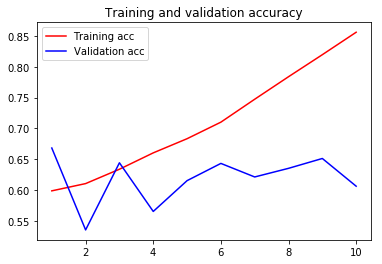

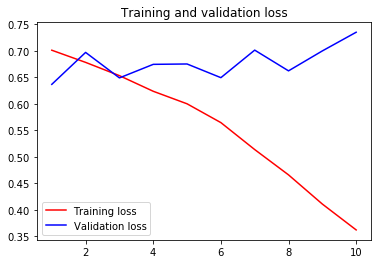

In [9]:
import matplotlib.pyplot as plt

acc = []
val_acc = []
loss = []
val_loss= []

acc += history.history['acc']
val_acc += history.history['val_acc']
loss += history.history['loss']
val_loss += history.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()